#Análisis y Reporte sobre el desempeño del modelo. Entrega Intermedia
A00829598
Juan Pablo Yáñez González

## Codigo completo de analisis

In [84]:
from scipy.special import yv
import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split


# Uso de regresion logistica para predecir diabetes en mujeres mayores de 21 años.


#Lectura CSV//dataset
data = pd.read_csv('diabetes2.csv')

x = (data.drop('Outcome', axis=1))
y = data['Outcome']

#Separacion del dataset de entrenamiento
x_main,x_test,y_main,y_test = train_test_split(x, y, test_size = 0.2, random_state = 4)

#Separación de datos de validación
x_train,x_val,y_train,y_val = train_test_split(x_main, y_main, test_size= 0.2, random_state = 4)

#Declaración del modelo como regresión logistica haciendo uso de sklearn, utilizamos el solver por defecto que hemos puesto de manera explicita y utilizamos 500 saltos enteros ya que 100 eran muy pocos para el modelo.
model = LogisticRegression(solver='lbfgs', max_iter= 500)

#Entrenamiento del modelo con la función fit de sklearn
model.fit(x_train,y_train)

#Realizamos predicciones para nuestros datos de prueba
y_pred = model.predict(x_val)
print('predicciones para nuestros datos de validación \n')
print(y_pred)
print(y_val)
print('')

# Realizamos predicciones para dos mujeres arriba de 21 años

#La primer mujer tiene un indice de glucosa alto al igual que el nivel de insulina sanguinea
print('Predicción para una mujer con: Embarazos: 0, Glucosa: 148, Presion en sangre: 72, Grosor de la piel: 35, Nivel de insulina: 83, IMC: 43, Función pedigree de diabetes: 0.521, Edad: 22 \n')
print(model.predict(np.array([[0,148,72,35,83,43,0.521,22]])) [0])
print('')
#La segunda mujer tiene un indice de glucosa regular al igual que el nivel de insulina sanguinea
print('Predicción para una mujer con: Embarazos: 0, Glucosa: 80, Presion en sangre: 72, Grosor de la piel: 35, Nivel de insulina: 70, IMC: 24, Función pedigree de diabetes: 0.521, Edad: 32 \n')
print(model.predict(np.array([[0,80,72,35,70,24,0.521,32]])) [0])
print('')


print('La exactitud del modelo usando nuestros datos de valicacion es de: ')
print(model.score(x_val,y_val))



predicciones para nuestros datos de validación 

[0 0 0 0 0 1 0 0 1 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 1 0 1 0 0 1 0 0 1 1 1 0 0 0 0 0 0 0 0 1 1 0 0 0 0 1 1 0 0 1 1
 0 0 1 0 0 0 1 0 1 0 0 1 1 0 1 0 0 0 1 0 0 1 0 0 0 0 0 1 0 1 0 0 1 1 1 1 0
 0 0 1 0 0 0 0 1 0 1 0 0]
198    1
93     1
723    0
101    0
739    1
      ..
732    1
607    0
95     0
379    0
616    0
Name: Outcome, Length: 123, dtype: int64

Predicción para una mujer con: Embarazos: 0, Glucosa: 148, Presion en sangre: 72, Grosor de la piel: 35, Nivel de insulina: 83, IMC: 43, Función pedigree de diabetes: 0.521, Edad: 22 

1

Predicción para una mujer con: Embarazos: 0, Glucosa: 80, Presion en sangre: 72, Grosor de la piel: 35, Nivel de insulina: 70, IMC: 24, Función pedigree de diabetes: 0.521, Edad: 32 

0

La exactitud del modelo usando nuestros datos de valicacion es de: 
0.7723577235772358


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  "X does not have valid feature names, but"


# Selección del modelo y lectura de datos

Para iniciar el modelo primero se tiene que cargar el dataset a utilizar, para este programa se hizo uso de un set compartido por “El Instituto Nacional de Diabetes y Enfermedades Digestivas y Renales” el cual analiza a diferentes mujeres arriba de 21 años que padecieron diabetes.

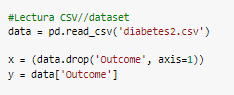

Se utilizó una regresión logística ya que nuestros datos son categóricos por lo que este modelo se adapta mejor a lo solicitado. La regresión logística busca predecir si el paciente tiene Diabetes.

# Separación y evaluación del modelo con un conjunto de prueba y un conjunto de validación (Train/Test/Validation).

Para poder entrenar el modelo de manera adecuada los datos del dataset fueron separados en 3 secciones, entrenamiento, testeo y validación. Los datos de entrenamiento como su nombre lo indica tienen la finalidad de ser la información alimentada al modelo para poder entrenarlo, por lo que esta parte ocupa más del 60% de datos disponibles en el dataset. Después se encuentran los datos de testeo que nos sirven para realizar predicciones y poder verificar la exactitud preliminar de nuestro modelo. Finalmente tenemos los datos de validación que son una serie de datos que nunca ha visto nuestro modelo por lo que estos llegan a indicarnos un puntaje de precisión de modelo mejor para su despliegue final.

En el código el dataset es dividido haciendo uso de la función train_test_split que nos ofrece sklearn, en esta podemos especificar la cantidad de datos a dividir para cada conjunto.

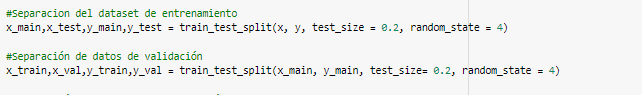



# Error de Bias 
Para obtener el grado de error en nuestro modelo hacemos uso de la funcion score de sklearn, que obtinene la diferencia entre la predicción esperada de nuestro modelo y los valores verdaderos, para esto evaluamos nuestro modelo de entrnamiento contra nuesto set de validación.

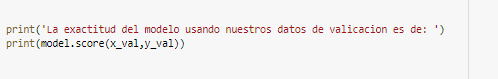


Así logramos obtener la exactitud del 77%
Esto quiere decir que nuestro modelo presenta un bias alto, lo que sugiere más suposiciones sobre la forma de la función objetivo.

ala igual que podemos observar que nuestra grafica de predicciones azul difiere con la roja que es nuestro conjunto de validación.



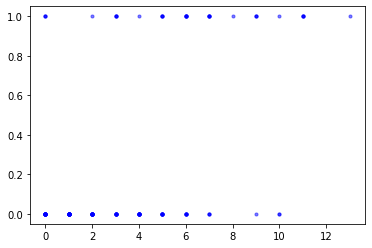

Outcome       0  1
Pregnancies       
0            17  2
1            16  3
2            12  3
3             9  4
4             7  5
5             8  4
6             7  5
7             4  4
8             0  1
9             1  3
10            1  2
11            2  2
13            1  0


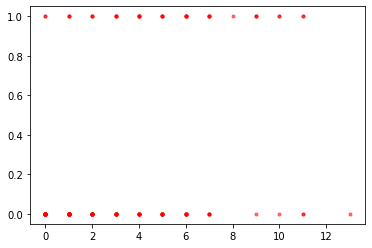

In [96]:
import matplotlib.pyplot as plt
colors1 = 'blue'
colors2 = 'red'
area = np.pi*3
plt.scatter(x_val['Pregnancies'], y_pred, s=area, c= colors1, alpha=0.5)
plt.show()
plt.scatter(x_val['Pregnancies'], y_val, s=area, c= colors2, alpha=0.5)
plt.show()

# Diagnóstico y explicación el grado de varianza

Como podemos observar la variancia dada por nuestros datos es bastante alta, lo que nos dice que estos estan muy dispersos unos del, por lo que los valores se encuentran alejados.

In [76]:
grado = np.var(x)
print(grado)

Pregnancies                    11.339272
Glucose                      1020.917262
BloodPressure                 374.159449
SkinThickness                 254.141900
Insulin                     13263.886875
BMI                            62.079046
DiabetesPedigreeFunction        0.109636
Age                           138.122964
dtype: float64


# Diagnóstico y explicación el nivel de ajuste del modelo

Para saber el nivel de ajuste de nuestro modelo necesitaremos comparar la exactitud del modelo con los datos entrenados y contra datos que no ha visto, si el modelo tiene mejor exactitud con los datos entrenados que con los no vistos esto quiere decir que esta ocurriendo un Overfitting del modelo es decir que el modelo ha memorizado los datos de entrenamiento y no necesariamente ha aprendido la relacion entre las etiquetas. Si sucede lo contrario estaria pasando un Underfitting.



In [99]:
#Datos de validación
print(model.score(x_val,y_val))
#Datos de entrenamiento
print(model.score(x_train,y_train))

0.7723577235772358
0.769857433808554


Aquí podemos observar que por muy poco en nuestro modelo esta pasando un Undefitting, lo cual nos dice que nuestro modelo tiene un bias muy alto y puede que no sea lo suficientemenete complejo para capturar la relación entre las etiquetas.